In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
from keras.datasets import mnist

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Convolutional neural network with ReLu activation and Adam optimizer from:
"CNN Model for Image Classification on MNIST and Fashion-MNIST Dataset" by Kadam, Shivam S. et. al. published in Journal of Scientific Research Volume 64, Issue 2, 2020

In [21]:
model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(28, 28, 1)),

    tf.keras.layers.Conv2D(32, (3, 3), input_shape=(28, 28, 1), activation='relu'),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Dropout(rate=0.25),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Dropout(rate=0.25),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Softmax()
])

model.compile(optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.00005),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

training_history = model.fit(np.stack(x_train), y_train, validation_split=0.1, epochs=20)

Epoch 1/20
1688/1688 [==============================] - 28s 16ms/step - loss: 0.6402 - accuracy: 0.7941 - val_loss: 0.1297 - val_accuracy: 0.9623
Epoch 2/20
1688/1688 [==============================] - 28s 17ms/step - loss: 0.2001 - accuracy: 0.9398 - val_loss: 0.0815 - val_accuracy: 0.9788
Epoch 3/20
1688/1688 [==============================] - 29s 17ms/step - loss: 0.1374 - accuracy: 0.9572 - val_loss: 0.0637 - val_accuracy: 0.9825
Epoch 4/20
1688/1688 [==============================] - 29s 17ms/step - loss: 0.1112 - accuracy: 0.9651 - val_loss: 0.0566 - val_accuracy: 0.9825
Epoch 5/20
1688/1688 [==============================] - 27s 16ms/step - loss: 0.0922 - accuracy: 0.9711 - val_loss: 0.0474 - val_accuracy: 0.9865
Epoch 6/20
1688/1688 [==============================] - 28s 17ms/step - loss: 0.0796 - accuracy: 0.9749 - val_loss: 0.0440 - val_accuracy: 0.9868
Epoch 7/20
1688/1688 [==============================] - 28s 17ms/step - loss: 0.0687 - accuracy: 0.9787 - val_loss: 0.0434 -

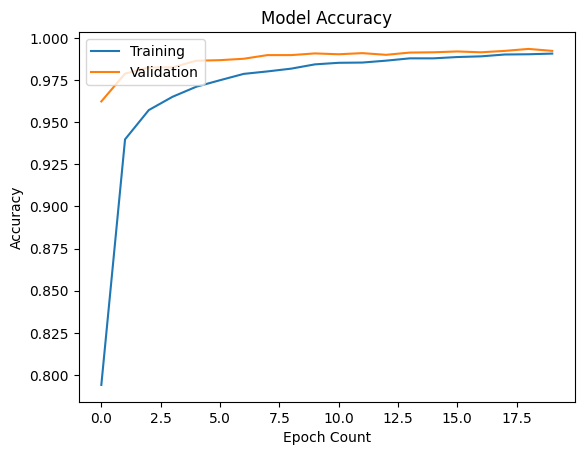

In [22]:
# Plot training metrics
plt.plot(training_history.history['accuracy'])
plt.plot(training_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch Count')
plt.legend(['Training', "Validation"], loc='upper left')
plt.show()

313/313 [==============================] - 2s 5ms/step
loss= 0.019072210416197777
accuracy= 0.9944000244140625
7 2 1 0 4 1 4 9 5 9 
0 6 9 0 1 5 9 7 3 4 
9 6 6 5 4 0 7 4 0 1 
3 1 3 4 7 2 7 1 2 1 
1 7 4 2 3 5 1 2 4 4 
6 3 5 5 6 0 4 1 9 5 
7 8 9 3 7 4 6 4 3 0 
7 0 2 9 1 7 3 2 9 7 
7 6 2 7 8 4 7 3 6 1 
3 6 9 3 1 4 1 7 6 9 


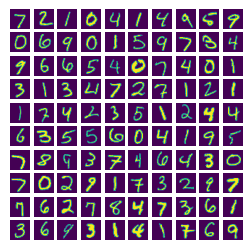

In [23]:
# Predictions on test set
predictions_vector = model.predict(np.stack(x_test))
predictions = [np.argmax(arr) for arr in predictions_vector]

score = model.evaluate(x_test, y_test, verbose=0)
print('loss=', score[0])
print('accuracy=', score[1])

# Display images and validation set results
ROWS = 10
COLS = 10

# Create subplot for display
fig, ax = plt.subplots(nrows=ROWS, ncols=COLS, figsize=(3,3))
np.vectorize(lambda axis : axis.axis("off"))(ax) # Turn of axis labels

images = [Image.fromarray(arr) for arr in x_test]

# Display images of test set
img_count = 0
for i in range(ROWS):
    for j in range(COLS):        
        if img_count < len(images):
            ax[i, j].imshow(images[img_count])
            img_count+=1

# Display predictions on test set set
value_count = 0
for i in range(ROWS):
    for j in range(COLS):
        if value_count < len(predictions):
            print(predictions[value_count], end=' ')
            value_count += 1
    print('')

1/1 [==============================] - 0s 12ms/step
7


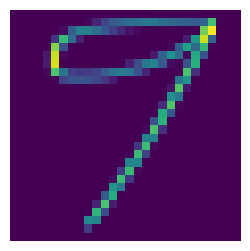

In [24]:
img_path = "./testimg/9.png"

img = Image.open(img_path).convert('L')
img = img.resize((28, 28))

# Convert so white 255 becomes black 0
arr = np.array(img)
for i in range(28):
    for j in range(28):
        arr[i, j] = 255 - arr[i, j]
img = Image.fromarray(arr)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(3,3))
np.vectorize(lambda axis : axis.axis("off"))(ax) # Turn of axis labels
ax.imshow(img)

print(np.argmax(model.predict(np.stack([np.asarray(img)]))))
